<a href="https://colab.research.google.com/github/WinnieSue/revenue-expenses-viz/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

df = pd.read_csv('/content/drive/My Drive/DATASETS/Spotify-Quarterly.csv')
df.head()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost
0,31-03-2023,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0
1,31-12-2022,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0
2,30-09-2022,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0
3,30-06-2022,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0
4,31-03-2022,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Date                           26 non-null     object 
 1   Total Revenue                  25 non-null     float64
 2   Cost of Revenue                25 non-null     float64
 3   Gross Profit                   25 non-null     float64
 4   Premium Revenue                25 non-null     float64
 5   Premium Cost Revenue           25 non-null     float64
 6   Premium Gross Profit           25 non-null     float64
 7   Ad Revenue                     25 non-null     float64
 8   Ad Cost of revenue             25 non-null     float64
 9   Ad gross Profit                25 non-null     float64
 10  MAUs                           25 non-null     float64
 11  Premium MAUs                   25 non-null     float64
 12  Ad MAUs                        25 non-null     float

In [5]:
df.isna().sum()

Date                             0
Total Revenue                    1
Cost of Revenue                  1
Gross Profit                     1
Premium Revenue                  1
Premium Cost Revenue             1
Premium Gross Profit             1
Ad Revenue                       1
Ad Cost of revenue               1
Ad gross Profit                  1
MAUs                             1
Premium MAUs                     1
Ad MAUs                          1
Premium ARPU                     0
Sales and Marketing Cost         1
Research and Development Cost    1
Genreal and Adminstraive Cost    1
dtype: int64

In [6]:
df.dropna(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           25 non-null     datetime64[ns]
 1   Total Revenue                  25 non-null     float64       
 2   Cost of Revenue                25 non-null     float64       
 3   Gross Profit                   25 non-null     float64       
 4   Premium Revenue                25 non-null     float64       
 5   Premium Cost Revenue           25 non-null     float64       
 6   Premium Gross Profit           25 non-null     float64       
 7   Ad Revenue                     25 non-null     float64       
 8   Ad Cost of revenue             25 non-null     float64       
 9   Ad gross Profit                25 non-null     float64       
 10  MAUs                           25 non-null     float64       
 11  Premium MAUs         

In [9]:
# Convert the 'date' column to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract the month from the 'date' column
df['month'] = df['Date'].dt.month
df.head()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost,month
0,2023-03-31,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0,3
1,2022-12-31,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0,12
2,2022-09-30,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0,9
3,2022-06-30,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0,6
4,2022-03-31,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0,3


<Axes: xlabel='month', ylabel='Total Revenue'>

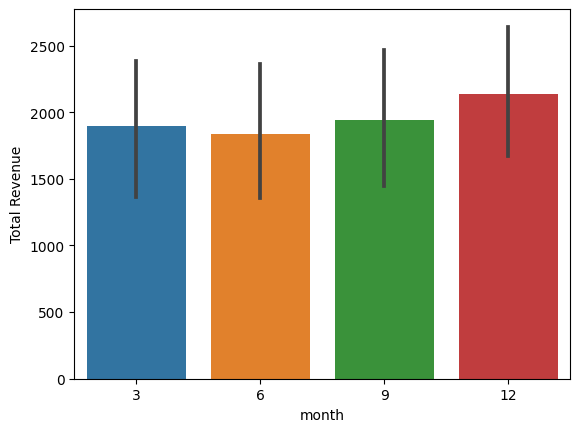

In [10]:
import seaborn as sns
sns.barplot(x="month", y="Total Revenue", data=df)

This is ignoring the year element so I am ignoring it too. Not giving any insights.

In [11]:
# Create a new column for month and year
df['month_year'] = df['Date'].dt.strftime('%Y-%m')
df.head()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost,month,month_year
0,2023-03-31,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0,3,2023-03
1,2022-12-31,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0,12,2022-12
2,2022-09-30,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0,9,2022-09
3,2022-06-30,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0,6,2022-06
4,2022-03-31,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0,3,2022-03


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '2023-03'),
  Text(1, 0, '2022-12'),
  Text(2, 0, '2022-09'),
  Text(3, 0, '2022-06'),
  Text(4, 0, '2022-03'),
  Text(5, 0, '2021-12'),
  Text(6, 0, '2021-09'),
  Text(7, 0, '2021-06'),
  Text(8, 0, '2021-03'),
  Text(9, 0, '2020-12'),
  Text(10, 0, '2020-09'),
  Text(11, 0, '2020-06'),
  Text(12, 0, '2020-03'),
  Text(13, 0, '2019-12'),
  Text(14, 0, '2019-09'),
  Text(15, 0, '2019-06'),
  Text(16, 0, '2019-03'),
  Text(17, 0, '2018-12'),
  Text(18, 0, '2018-09'),
  Text(19, 0, '2018-06'),
  Text(20, 0, '2018-03'),
  Text(21, 0, '2017-12'),
  Text(22, 0, '2017-09'),
  Text(23, 0, '2017-06'),
  Text(24, 0, '2017-03')])

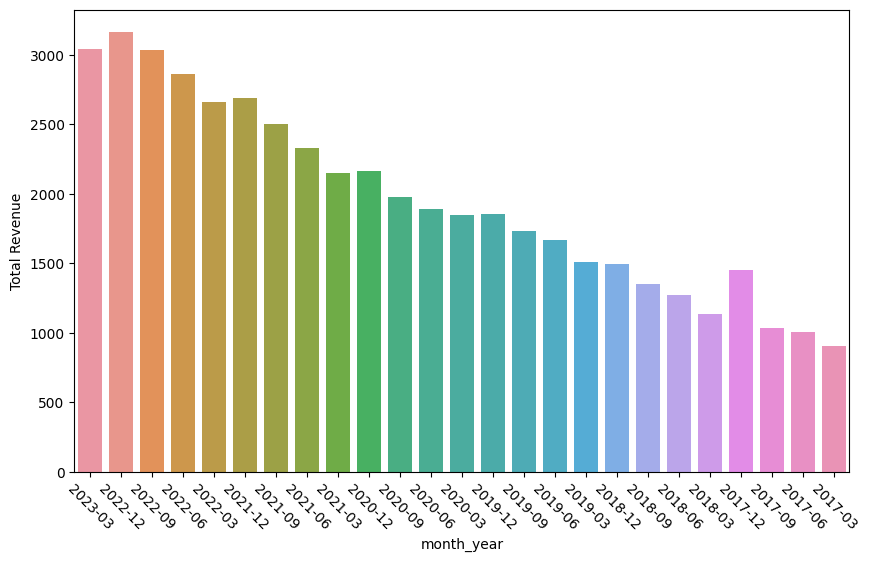

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="month_year", y="Total Revenue", data=df)
plt.xticks(rotation = -45)

There has been a consistent increase in revenue over time. I wonder why there is a decline in the first quarter of 2023. The dataset is small but I am digging deeper to find reasons and also create more visualizations.

In [13]:
# using the groupby function
premiums = ['Premium Revenue', 'Premium Cost Revenue', 'Premium Gross Profit','month_year']
premium_df = df[premiums]
premium_df.head()

,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,month_year
0,2713.0,1937.0,776.0,2023-03
1,2717.0,1939.0,778.0,2022-12
2,2651.0,1908.0,743.0,2022-09
3,2504.0,1804.0,700.0,2022-06
4,2379.0,1704.0,675.0,2022-03


In [14]:
premium_df['month_year'] = pd.to_datetime(premium_df['month_year'], format='%Y-%m')
premium_df.head()

<ipython-input-14-c70d5b3f49b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  premium_df['month_year'] = pd.to_datetime(premium_df['month_year'], format='%Y-%m')


,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,month_year
0,2713.0,1937.0,776.0,2023-03-01
1,2717.0,1939.0,778.0,2022-12-01
2,2651.0,1908.0,743.0,2022-09-01
3,2504.0,1804.0,700.0,2022-06-01
4,2379.0,1704.0,675.0,2022-03-01


In [15]:
premium_df['Premium Cost Revenue'].min()

686.0

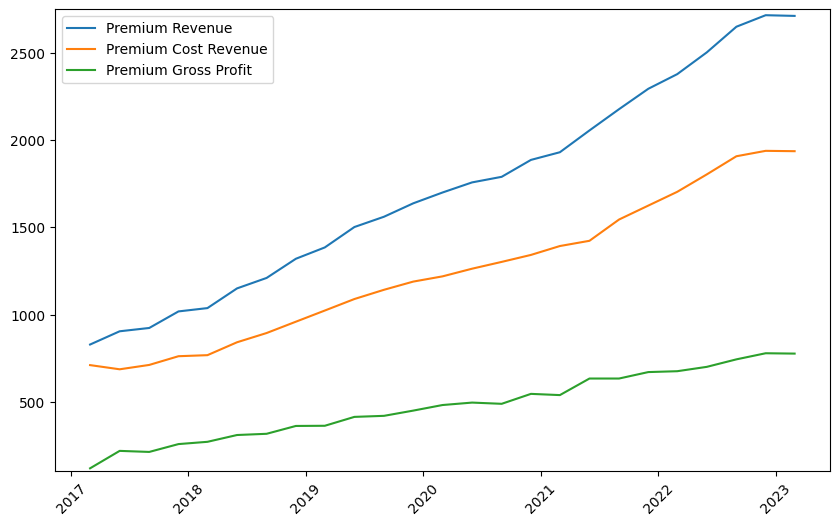

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot each line individually
plt.plot(premium_df['month_year'], premium_df['Premium Revenue'], label='Premium Revenue')
plt.plot(premium_df['month_year'], premium_df['Premium Cost Revenue'], label='Premium Cost Revenue')
plt.plot(premium_df['month_year'], premium_df['Premium Gross Profit'], label='Premium Gross Profit')
plt.legend()
# Set y-axis limits
# sns.lineplot(x=premium_df["month_year"], y='value', hue = 'variable', data=pd.melt(premium_df, ['month_year']))

# setting the y axix limits
plt.ylim(100,2750)
plt.xticks(rotation = 45)

plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Date                           25 non-null     datetime64[ns]
 1   Total Revenue                  25 non-null     float64       
 2   Cost of Revenue                25 non-null     float64       
 3   Gross Profit                   25 non-null     float64       
 4   Premium Revenue                25 non-null     float64       
 5   Premium Cost Revenue           25 non-null     float64       
 6   Premium Gross Profit           25 non-null     float64       
 7   Ad Revenue                     25 non-null     float64       
 8   Ad Cost of revenue             25 non-null     float64       
 9   Ad gross Profit                25 non-null     float64       
 10  MAUs                           25 non-null     float64       
 11  Premium MAUs         

In [18]:
#df['month_year'] = pd.to_datetime(df['month_year'], format='%Y-%m')
df['year'] = df['Date'].dt.year
df.head()

,Date,Total Revenue,Cost of Revenue,Gross Profit,Premium Revenue,Premium Cost Revenue,Premium Gross Profit,Ad Revenue,Ad Cost of revenue,Ad gross Profit,MAUs,Premium MAUs,Ad MAUs,Premium ARPU,Sales and Marketing Cost,Research and Development Cost,Genreal and Adminstraive Cost,month,month_year,year
0,2023-03-31,3042.0,2276.0,776.0,2713.0,1937.0,776.0,329.0,339.0,-10.0,515.0,210.0,317.0,4.32,347.0,435.0,140.0,3,2023-03,2023
1,2022-12-31,3166.0,2365.0,801.0,2717.0,1939.0,778.0,449.0,426.0,23.0,489.0,205.0,295.0,4.55,453.0,415.0,164.0,12,2022-12,2022
2,2022-09-30,3036.0,2286.0,750.0,2651.0,1908.0,743.0,385.0,378.0,7.0,456.0,195.0,273.0,4.63,432.0,386.0,160.0,9,2022-09,2022
3,2022-06-30,2864.0,2160.0,704.0,2504.0,1804.0,700.0,360.0,356.0,4.0,433.0,188.0,265.0,4.54,391.0,336.0,171.0,6,2022-06,2022
4,2022-03-31,2661.0,1990.0,671.0,2379.0,1704.0,675.0,282.0,286.0,-4.0,422.0,182.0,252.0,4.38,296.0,250.0,131.0,3,2022-03,2022


In [42]:
yearly_maus = df.groupby('year')['MAUs'].sum()
yearly_maus

year
2017     579.0
2018     748.0
2019     968.0
2020    1250.0
2021    1508.0
2022    1800.0
2023     515.0
Name: MAUs, dtype: float64

In [49]:
columns = ['year','total']
maus_df = pd.DataFrame(yearly_maus, columns=columns)
maus_df


,year,total


In [20]:
premium_maus = df.groupby('year')['Premium MAUs'].sum()
premium_maus

year
2017    244.0
2018    341.0
2019    445.0
2020    567.0
2021    675.0
2022    770.0
2023    210.0
Name: Premium MAUs, dtype: float64

In [28]:
pmaus_df = premium_maus.to_frame()
pmaus_df

,Premium MAUs
year,
2017,244.0
2018,341.0
2019,445.0
2020,567.0
2021,675.0
2022,770.0
2023,210.0


In [21]:
Ad_maus = df.groupby('year')['Ad MAUs'].sum()
Ad_maus

year
2017     349.0
2018     425.0
2019     546.0
2020     717.0
2021     874.0
2022    1085.0
2023     317.0
Name: Ad MAUs, dtype: float64

In [29]:
admaus_df = Ad_maus.to_frame()
admaus_df

,Ad MAUs
year,
2017,349.0
2018,425.0
2019,546.0
2020,717.0
2021,874.0
2022,1085.0
2023,317.0


KeyError: ignored

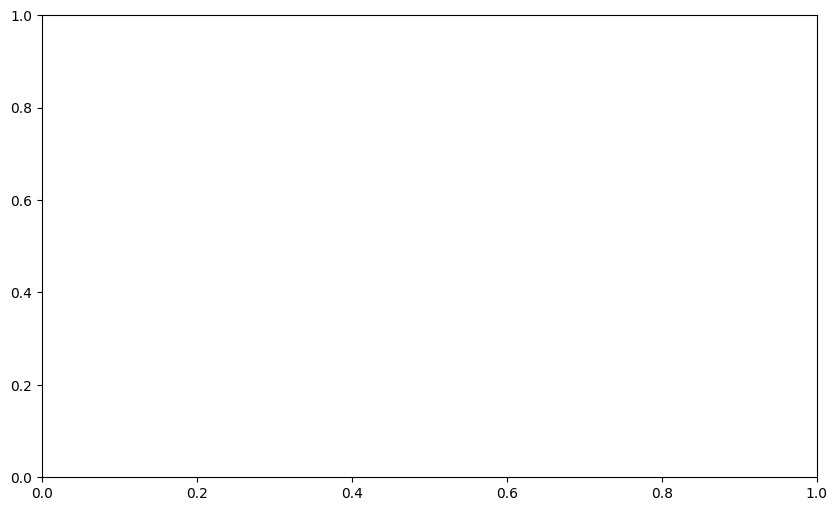

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot each line individually
sns.barplot(x=maus_df['year'],y=maus_df['MAUs'])
plt.plot(maus_df['year'], maus_df['MAUs'], marker = 'bar', label='MAUs')
#plt.plot(premium_df['month_year'], premium_df['Premium Cost Revenue'], label='Premium Cost Revenue')
#plt.plot(premium_df['month_year'], premium_df['Premium Gross Profit'], label='Premium Gross Profit')
plt.legend()